In [25]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [26]:
def carregar_dados(ticker, start='2021-01-01', end='2025-04-01'):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Close']].dropna()
    return df

def preparar_dados(df, look_back=60):
    df = df[['Close']].dropna()
    
    if len(df) <= look_back:
        raise ValueError(f"Dados insuficientes: apenas {len(df)} linhas, é necessário mais que {look_back}.")

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)

    X, y = [], []
    for i in range(look_back, len(scaled)):
        X.append(scaled[i-look_back:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)
    return X, y, scaler

def criar_modelo(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [ ]:
# import optuna
# from sklearn.metrics import r2_score

# def objective(trial, df):
#     # Hiperparâmetros sugeridos
#     look_back = trial.suggest_int('look_back', 30, 90)
#     units = trial.suggest_int('units', 32, 128)
#     dropout = trial.suggest_float('dropout', 0.1, 0.5)
#     num_layers = trial.suggest_int('num_layers', 1, 3)
#     batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
#     epochs = trial.suggest_int('epochs', 10, 50)

#     try:
#         X, y, scaler = preparar_dados(df, look_back=look_back)
#     except ValueError:
#         return -np.inf  # R² ruim em caso de erro

#     split = int(0.8 * len(X))
#     X_train, X_test = X[:split], X[split:]
#     y_train, y_test = y[:split], y[split:]

#     model = Sequential()
#     for i in range(num_layers):
#         return_seq = (i < num_layers - 1)
#         model.add(LSTM(units=units, return_sequences=return_seq, input_shape=(X_train.shape[1], 1)))
#         model.add(Dropout(dropout))
#     model.add(Dense(units=1))

#     model.compile(optimizer='adam', loss='mean_squared_error')
#     model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

#     y_pred = model.predict(X_test)
#     y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
#     y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

#     r2 = r2_score(y_test_rescaled, y_pred_rescaled)
#     return r2  # Quanto maior, melhor


In [ ]:
# import optuna

# # Callback para parar quando R² atingir 0.93
# def parar_quando_r2_alto(study, trial):
#     if study.best_value is not None and study.best_value >= 0.93:
#         print(f"🔁 Parando otimização: R² ótimo atingido ({study.best_value:.4f})")
#         return True  # Para a otimização
#     return False

# # Loop para todos os ativos
# for ticker, nome in ativos.items():
#     print(f"\n🔍 Otimizando {nome} ({ticker})")
#     df = carregar_dados(ticker)

#     study = optuna.create_study(direction='maximize')
#     study.optimize(lambda trial: objective(trial, df), n_trials=30, callbacks=[parar_quando_r2_alto])

#     print(f" Melhores parâmetros para {nome}:")
#     print(study.best_params)
#     print(f" Melhor R²: {study.best_value:.4f}")


[*********************100%***********************]  1 of 1 completed


 Treinando modelo final: Apple (AAPL)



C:\Users\Mariana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MSE: 23.3383 | MAE: 3.7174 | MAPE: 1.64% | R²: 0.8358


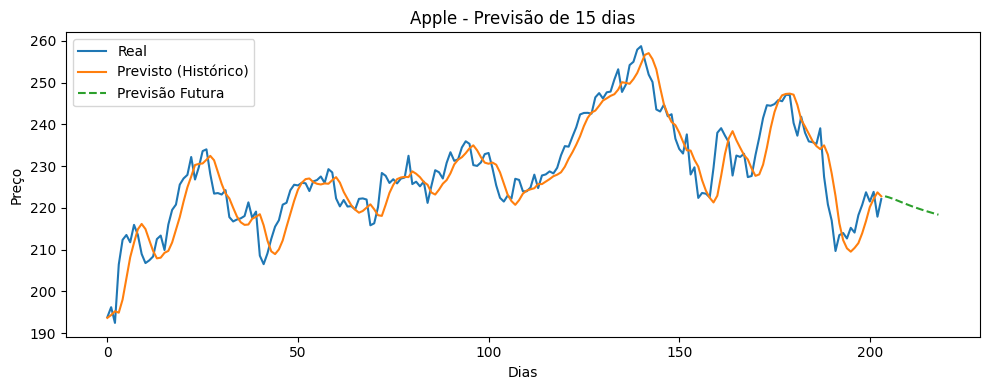

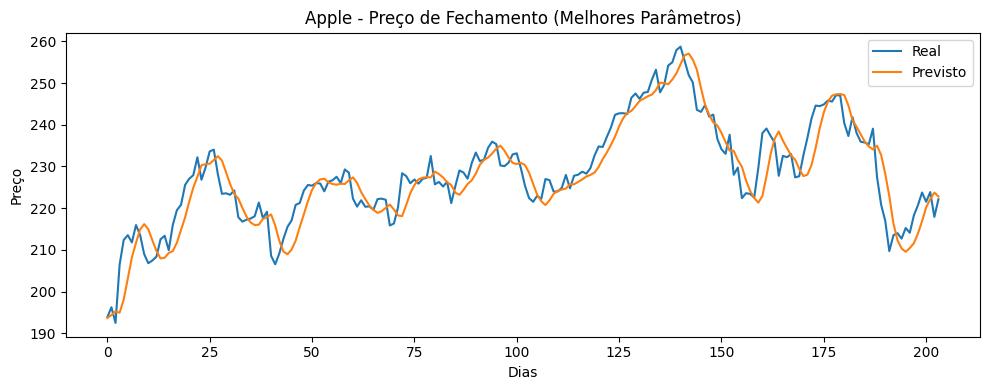

[*********************100%***********************]  1 of 1 completed


 Treinando modelo final: IBOVESPA (^BVSP)



C:\Users\Mariana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
MSE: 1700667.7504 | MAE: 1018.4076 | MAPE: 0.80% | R²: 0.9211


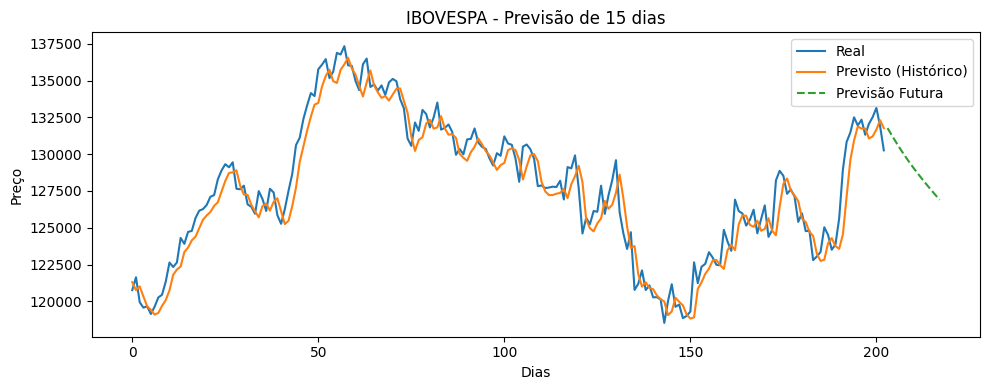

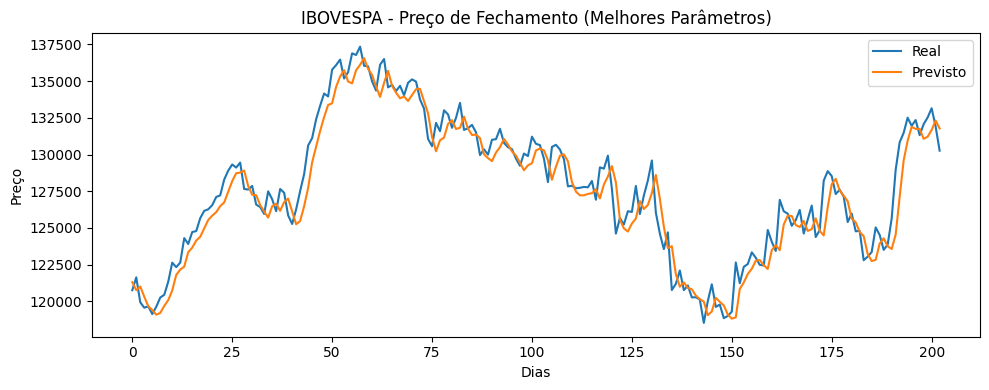

[*********************100%***********************]  1 of 1 completed


 Treinando modelo final: Itaú Unibanco (ITUB4.SA)



C:\Users\Mariana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
MSE: 0.3278 | MAE: 0.4421 | MAPE: 1.43% | R²: 0.8805


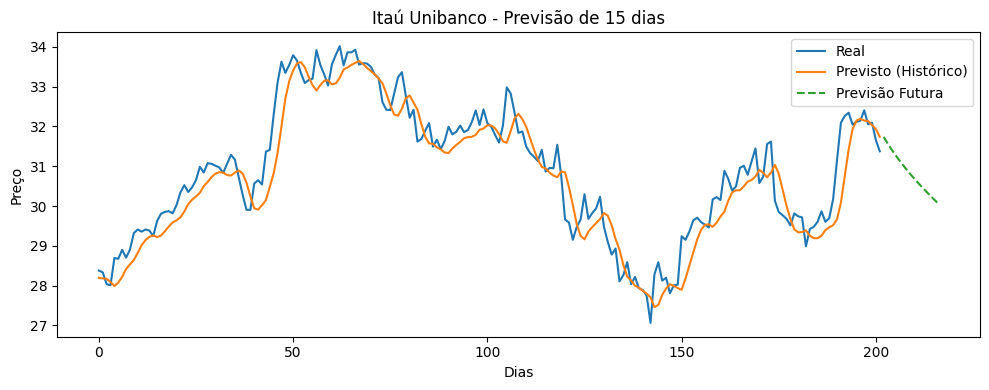

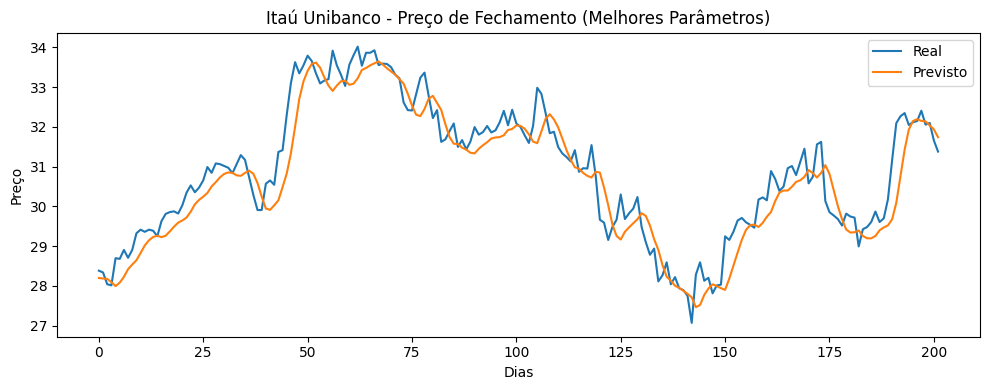

[*********************100%***********************]  1 of 1 completed


 Treinando modelo final: S&P 500 (^GSPC)



C:\Users\Mariana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MSE: 7205.4395 | MAE: 72.8893 | MAPE: 1.27% | R²: 0.8651


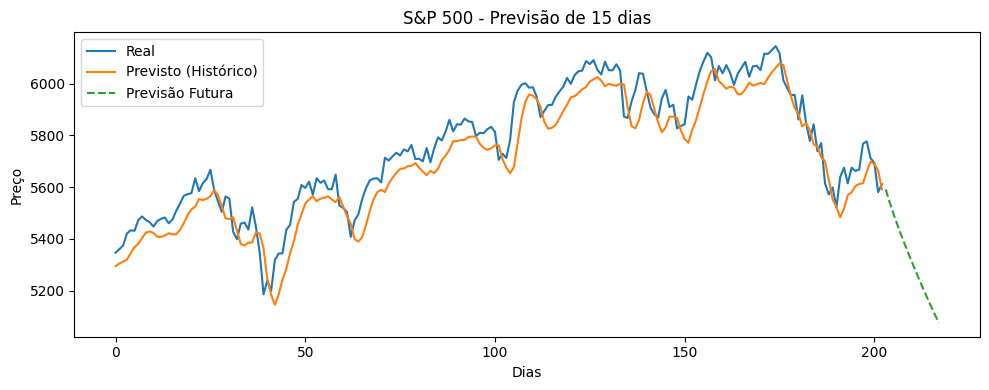

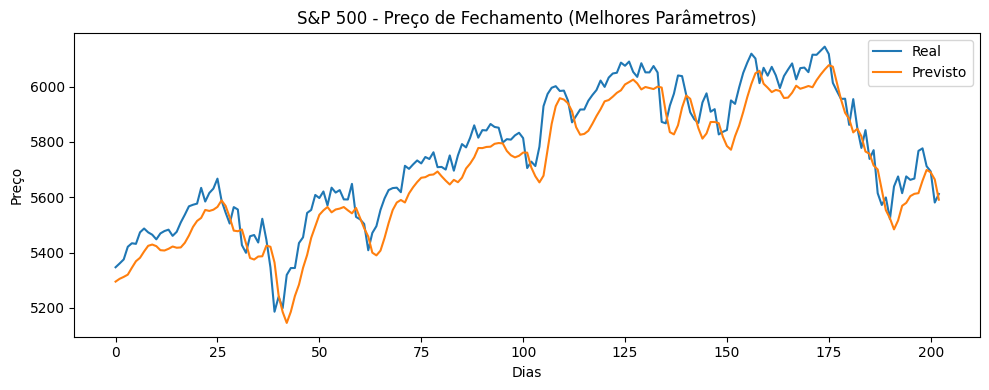

,Ativo,MSE,MAE,MAPE (%),R²
1,IBOVESPA,1.700668e+06,1018.407635,0.795966,0.921062
3,S&P 500,7.205439e+03,72.889292,1.266879,0.865119
2,Itaú Unibanco,3.277626e-01,0.442106,1.431107,0.880511
0,Apple,2.333834e+01,3.717421,1.643058,0.835798


In [29]:
# Armazenar métricas de todos os ativos
resultados_metricas = []
#melhores parametros para cada ativo com base no optuna
melhores_parametros = {
    'AAPL': {'look_back': 47, 'units': 68, 'dropout': 0.13918716424300842, 'num_layers': 1, 'batch_size': 32, 'epochs': 42},
    '^BVSP': {'look_back': 45, 'units': 107, 'dropout': 0.13092334630550548, 'num_layers': 2, 'batch_size': 32, 'epochs': 50},
    'ITUB4.SA': {'look_back': 47, 'units': 94, 'dropout': 0.215672559117348, 'num_layers': 2, 'batch_size': 32, 'epochs': 41},
    '^GSPC': {'look_back': 53, 'units': 116, 'dropout': 0.3296817551908157, 'num_layers': 1, 'batch_size': 16, 'epochs': 49}
}


def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mape, r2

def prever_futuro(model, ultimos_dados, scaler, n_steps=15):
    previsoes = []
    entrada = ultimos_dados.copy()

    for _ in range(n_steps):
        entrada_reshaped = entrada.reshape(1, entrada.shape[0], 1)
        pred = model.predict(entrada_reshaped, verbose=0)
        previsoes.append(pred[0][0])

        # Adiciona a nova previsão e remove a mais antiga
        entrada = np.append(entrada[1:], pred)

    previsoes_rescaled = scaler.inverse_transform(np.array(previsoes).reshape(-1, 1))
    return previsoes_rescaled


def treinar_e_avaliar_com_metricas(ticker, nome_ticker):
    print(f"\n Treinando modelo final: {nome_ticker} ({ticker})")
    df = carregar_dados(ticker)
    
    params = melhores_parametros[ticker]
    try:
        X, y, scaler = preparar_dados(df, look_back=params['look_back'])
    except ValueError:
        print(f"⚠️ Dados insuficientes para {nome_ticker}")
        return

    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential()
    for i in range(params['num_layers']):
        return_seq = (i < params['num_layers'] - 1)
        model.add(LSTM(units=params['units'], return_sequences=return_seq, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(params['dropout']))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse, mae, mape, r2 = calcular_metricas(y_test_rescaled, y_pred_rescaled)
    print(f"MSE: {mse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

    resultados_metricas.append({
        'Ativo': nome_ticker,
        'MSE': mse,
        'MAE': mae,
        'MAPE (%)': mape,
        'R²': r2
    })

    # Previsão dos próximos 15 dias
    n_dias_futuros = 15
    ultimos_dados = X[-1].flatten()  # última sequência conhecida

    futuro = prever_futuro(model, ultimos_dados, scaler, n_steps=n_dias_futuros)

    # Plot da previsão futura
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label='Real')
    plt.plot(range(len(y_test_rescaled)), y_pred_rescaled, label='Previsto (Histórico)')
    plt.plot(range(len(y_test_rescaled), len(y_test_rescaled) + n_dias_futuros), futuro, label='Previsão Futura', linestyle='--')
    plt.title(f'{nome_ticker} - Previsão de {n_dias_futuros} dias')
    plt.xlabel('Dias')
    plt.ylabel('Preço')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_rescaled, label='Real')
    plt.plot(y_pred_rescaled, label='Previsto')
    plt.title(f'{nome_ticker} - Preço de Fechamento (Melhores Parâmetros)')
    plt.xlabel('Dias')
    plt.ylabel('Preço')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
# Rodar com avaliação de métricas
for ticker, nome in ativos.items():
    treinar_e_avaliar_com_metricas(ticker, nome)

# Mostrar tabela de comparação
df_resultados = pd.DataFrame(resultados_metricas)
df_resultados = df_resultados.sort_values(by='MAPE (%)')
display(df_resultados)


In [ ]:
from datetime import datetime
import os
import pandas as pd


# Nome do arquivo com timestamp
arquivo_excel = f"../resultados/previsoes_modelos_{datetime.now().strftime('%Y%m%d_%H%M%S')}.xlsx"

# Mapeamento opcional se usar nomes diferentes dos tickers dos arquivos
mapa_tickers = {
    'Apple': 'AAPL',
    'IBOV': '^BVSP',
    'S&P500': '^GSPC',
    'ITUB4': 'ITUB4.SA'
}

with pd.ExcelWriter(arquivo_excel) as writer:
    for nome_ativo, ticker in mapa_tickers.items():
        try:
            df = carregar_dados(ticker)  # deve retornar DataFrame com coluna 'Close'
            if df.empty or len(df) < 61:
                print(f"⚠️ Dados insuficientes para {nome_ativo}.")
                continue

            X, y, scaler = preparar_dados(df)

            split = int(0.8 * len(X))
            X_train, X_test = X[:split], X[split:]
            y_train, y_test = y[:split], y[split:]

            model = criar_modelo((X_train.shape[1], 1))
            model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

            y_pred = model.predict(X_test)

            y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
            y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
            # Datas reais correspondentes às previsões de teste
            datas = df.index[60 + split:]    

            df_previsao = pd.DataFrame({    
                'Data': datas,
                'Real': y_test_rescaled.flatten(),
                'Previsto': y_pred_rescaled.flatten()
            })

            aba_nome = nome_ativo.replace(' ', '_')[:31]
            df_previsao.to_excel(writer, sheet_name=aba_nome, index=False)

            print(f"✅ Previsões exportadas para {nome_ativo}")

        except Exception as e:
            print(f" Erro ao processar {nome_ativo}: {e}")
